In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
data = pd.read_csv('/content/database.csv')
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [24]:
data = data[['Date','Time','Latitude','Longitude','Depth','Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [25]:
import datetime
import time

timestamp=[]
for d,t in zip(data['Date'],data['Time']):
  try:
    ts=datetime.datetime.strptime(d+' '+t,'%m/%d/%Y %H:%M:%S')
    timestamp.append(time.mktime(ts.timetuple()))
  except ValueError:
    timestamp.append('ValueError')

timestamp = pd.Series(timestamp)
data['Timestamp']=timestamp.values
final_data= data.drop(['Date','Time'],axis=1)
final_data = final_data[final_data['Timestamp']!='ValueError']
final_data.head()




,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basemap 1.4.1 requires numpy<1.27,>=1.21; python_version >= "3.8", but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014

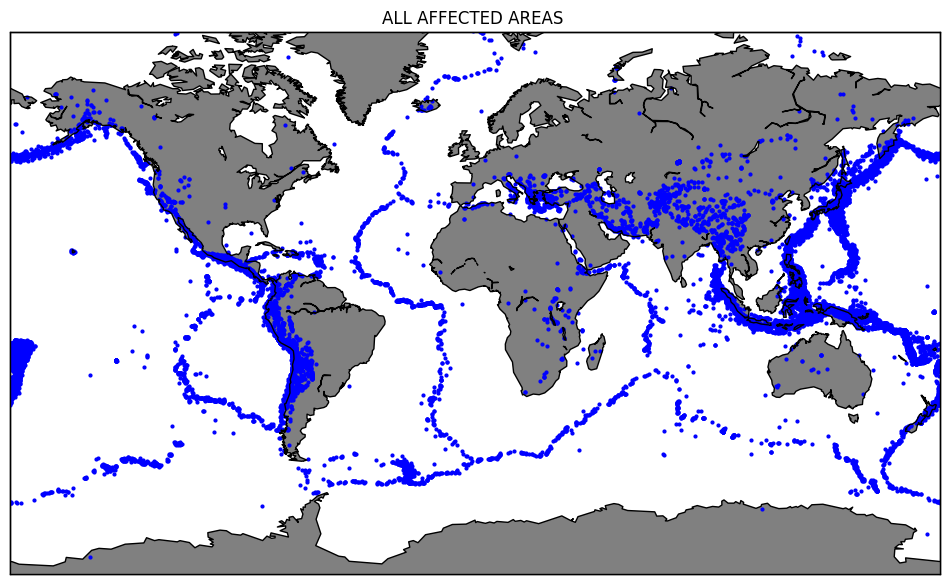

In [3]:
!pip install --upgrade numpy
!pip install --upgrade basemap
#DATA VISUALIZATION:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('/content/database.csv')
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12, 10))
plt.title('ALL AFFECTED AREAS ')
m.plot(x, y, "o", markersize=2, color='blue')
m.drawcoastlines()
m.fillcontinents(color='grey')
m.drawmapboundary()
plt.show()

In [7]:
# SPLITTING DATASET :
import datetime
import time

timestamp=[]
for d,t in zip(data['Date'],data['Time']):
  try:
    ts=datetime.datetime.strptime(d+' '+t,'%m/%d/%Y %H:%M:%S')
    timestamp.append(time.mktime(ts.timetuple()))
  except ValueError:
    timestamp.append('ValueError')

timestamp = pd.Series(timestamp)
data['Timestamp']=timestamp.values
final_data= data.drop(['Date','Time'],axis=1)
final_data = final_data[final_data['Timestamp']!='ValueError']
final_data.head()


,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Timestamp
0,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,-157630542.0
1,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,-157465811.0
2,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,-157355642.0
3,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,-157093817.0
4,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,-157026430.0


In [9]:
X = final_data[['Timestamp','Latitude','Longitude']]
Y = final_data[['Magnitude','Depth']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (18727, 3)
X_test shape: (4682, 3)
Y_train shape: (18727, 2)
Y_test shape: (4682, 2)


In [10]:
# CREATING A NEURAL NETWORK:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='linear'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [13]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (18727, 3)
X_test shape: (4682, 3)
Y_train shape: (18727, 2)
Y_test shape: (4682, 2)


In [25]:
# Convert 'Timestamp', 'Magnitude', and 'Depth' columns to numeric
X_train['Timestamp'] = pd.to_numeric(X_train['Timestamp'])
X_test['Timestamp'] = pd.to_numeric(X_test['Timestamp'])
Y_train['Magnitude'] = pd.to_numeric(Y_train['Magnitude'])
Y_train['Depth'] = pd.to_numeric(Y_train['Depth'])
Y_test['Magnitude'] = pd.to_numeric(Y_test['Magnitude'])
Y_test['Depth'] = pd.to_numeric(Y_test['Depth'])

# Now proceed with model fitting
model.fit(X_train, Y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9813 - loss: 0.5037 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9802 - loss: 0.5040 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.5036 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9822 - loss: 0.5033 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9825 - loss: 0.5035 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9813 - loss: 0.5037 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.5033 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.5037 - 

In [26]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, Y_test))

[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1873/1873 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9801 - loss: 0.5040 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9818 - loss: 0.5040 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9800 - loss: 0.5043 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9799 - loss: 0.5039 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9820 - loss: 0.5042 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9808 - loss: 0.5044 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.5037 - val_accuracy: 0.9814 - val_loss: 0.5038
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.5036 - val_accu